
<div style="background-image: linear-gradient(to right, #4b4cff , #00d4ff); text-align: center; padding: 50px;">
  <h1 style="font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; font-size: 48px; color: white; text-shadow: 2px 2px #4b4cff;">
  House Prices Prediction
  </h1>
</div>

<h2 style="color:#f7ce5b; font-family: Arial, sans-serif; font-size: 40px; margin-top: 50px; border-bottom: 2px solid #f7ce5b;">
Library
</h2>

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import missingno as msno

<h2 style="color:#f7ce5b; font-family: Arial, sans-serif; font-size: 40px; margin-top: 50px; border-bottom: 2px solid #f7ce5b;">
Data
</h2>

In [4]:
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")

<h2 style="color:#f7ce5b; font-family: Arial, sans-serif; font-size: 40px; margin-top: 50px; border-bottom: 2px solid #f7ce5b;">
Visualization
</h2>

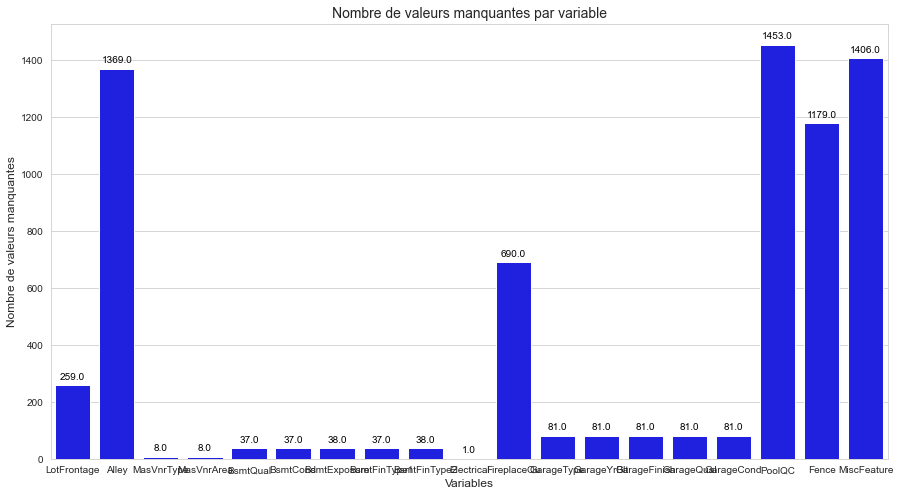

In [5]:
missing_values = train.isnull().sum()
missing_values = missing_values[missing_values > 0]

sns.set_style("whitegrid")
plt.figure(figsize=(15,8))
barplot = sns.barplot(x=missing_values.index, y=missing_values.values, color='blue')

plt.xlabel("Variables", fontsize=12)
plt.ylabel("Nombre de valeurs manquantes", fontsize=12)
plt.title("Nombre de valeurs manquantes par variable", fontsize=14)

for bar in barplot.patches:
    plt.annotate(format(bar.get_height()), 
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                 ha='center', va='center', 
                 xytext=(0, 8), 
                 textcoords='offset points', fontsize=10, color='black')

plt.show()

<par>
We can see here the amount of missing values ('Nan'). But in our case missing values can represent a 'No', for example houses with no fence will have a missing value instead of a '0' or 'No fence'.
</par>

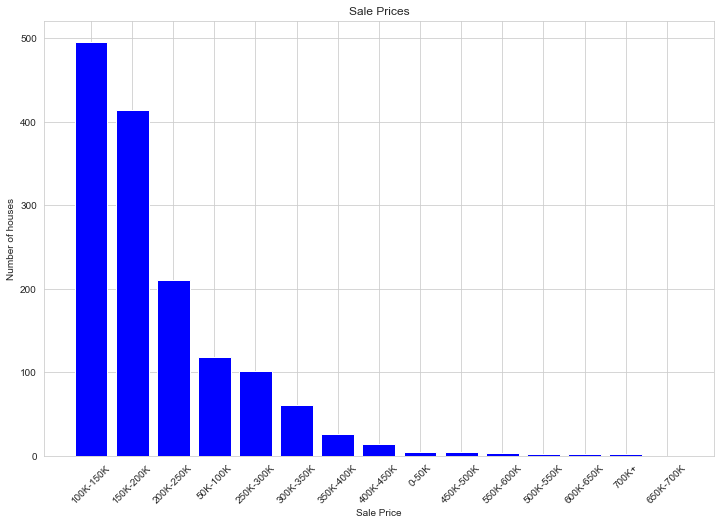

In [6]:
print_data = train.copy()

bins = [0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000, 550000, 600000, 650000, 700000, max(train['SalePrice'])]
labels = ['0-50K', '50K-100K', '100K-150K', '150K-200K', '200K-250K', '250K-300K', '300K-350K', '350K-400K', '400K-450K', '450K-500K', '500K-550K', '550K-600K', '600K-650K', '650K-700K', '700K+']

print_data['SalePrice'] = pd.cut(train['SalePrice'], bins=bins, labels=labels)

plt.figure(figsize=(12, 8))
plt.bar(print_data['SalePrice'].value_counts().index, print_data['SalePrice'].value_counts().values, color='blue')
plt.title('Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Number of houses')
plt.xticks(rotation=45)
plt.show()

There is a graph in order to print the repartition of houses prices. 

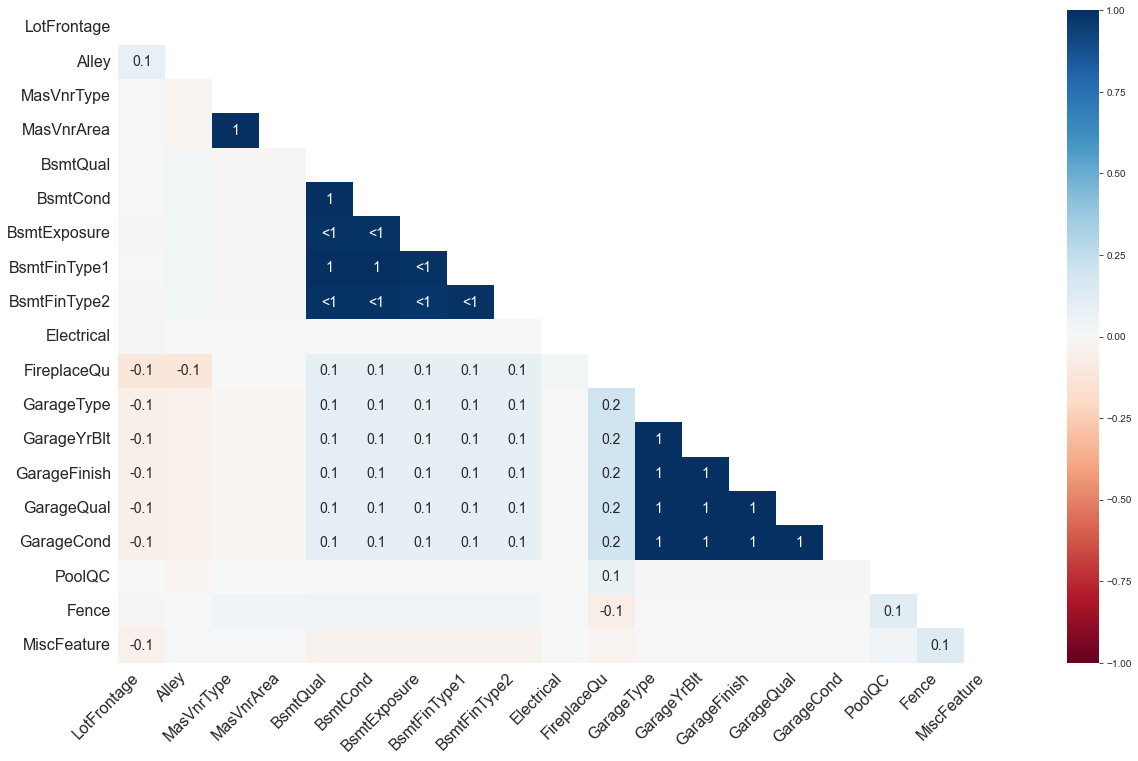

In [7]:
msno.heatmap(train)
plt.show()

Here we have a matrix that shows correlation between missing values.

<AxesSubplot:>

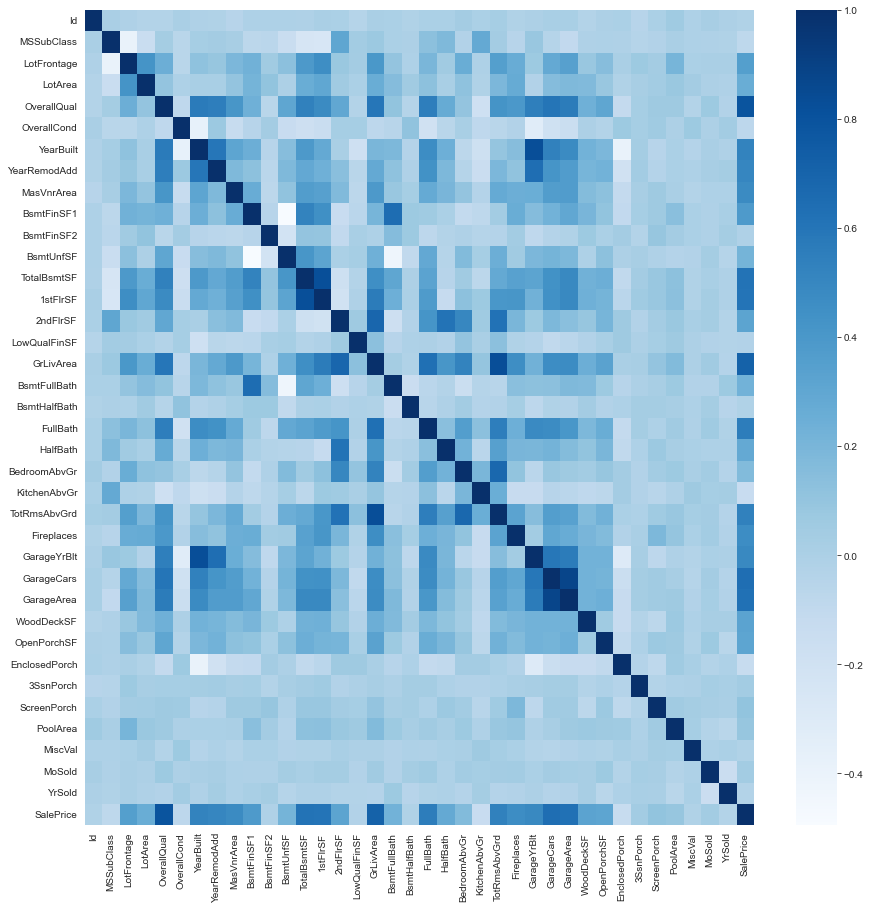

In [9]:
corrmat = train.corr()
plt.figure(figsize= (15 , 15))
sns.heatmap(corrmat,cmap="Blues")